In [1]:
# takes 25m for 3m records

# todo:
# double check that acbl_hand_records_dd_nwse_experiments.pkl contains swapped E-W.
# acbl_hand_records.pkl are incorrect due to legacy ignoring of vul. Clean here or correct sql in previous step? 
# board_record_string has replaced '10' with 'T'. This is confusing as it doesn't match sql. Needed?

# next steps:
# merge-hand-records.ipynb merges acbl and tcg standardized hand records?

# previous steps:
# acbl_sql_to_hand_records.ipynb creates acbl_hand_records.pkl

# Requirements
# https://github.com/Afwas/python-dds with some of my mods.
# If pickle errors: pip install --upgrade pandas

In [2]:
import pandas as pd
import pathlib
import mlBridgeLib
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import display # needed to define display() method in vscode

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# takes 1m
acbl_hand_records_augmented_df = acblPath.joinpath('acbl_hand_records_dd_nwse_experiments.pkl') # tip: overwrite file with ..._dd_experiments.pkl for restart
stdhrs = pd.read_pickle(acbl_hand_records_augmented_df)
display(len(stdhrs),stdhrs)

3144755

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])","(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,"(6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))",...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])","(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,"(6.5, ((1.0, (0, 0.5, 0, 0.5)), (2, (1, 0, 0, 1)), (2.0, (0.5, 0, 1.5, 0)), (1.5, (0, 1, 0.5, 0))))",...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2

In [6]:
# takes 15s
df = stdhrs[stdhrs['Par_nwse'].notna()].copy()
df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,QT,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])","(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,"(6.5, ((1.5, (0, 0.5, 0, 1)), (2.5, (1, 0, 1, 0.5)), (2.5, (0.5, 1, 1, 0)), (0, (0, 0, 0, 0))))",...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])","(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,"(6.5, ((1.0, (0, 0.5, 0, 0.5)), (2, (1, 0, 0, 1)), (2.0, (0.5, 0, 1.5, 0)), (1.5, (0, 1, 0.5, 0))))",...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2

In [7]:
# takes 7s
#stdhrs.drop(['DDmakes_nwse','Par_nwse'],axis='columns',inplace=True)
if 'Par_var' not in df:
    df.insert(df.columns.get_loc('Par')+1,'Par_var',None)
par_var_col_loc = df.columns.get_loc('Par_var')
df

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,CT_NS_H,CT_NS_S,CT_NS_N,CT_EW_C,CT_EW_D,CT_EW_H,CT_EW_S,CT_EW_N,CT_NS_C_Pass,CT_NS_C_Partial,CT_NS_C_Game,CT_NS_C_SSlam,CT_NS_C_GSlam,CT_NS_D_Pass,CT_NS_D_Partial,CT_NS_D_Game,CT_NS_D_SSlam,CT_NS_D_GSlam,CT_NS_H_Pass,CT_NS_H_Partial,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",None,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,Game,Pass,Partial,Pass,Partial,Pass,Partial,Pass,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",None,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,Partial,Partial,Partial,Pass,Pass,Pass,Pass,Pass,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ

In [8]:
# takes 50s
df['Par_var'] = df.apply(lambda r: r['Par'][0]-r['Par_nwse'][0],axis='columns')
df['Par_var'].value_counts()

 0       1274930
 30       156542
-30       151196
 10        65796
-10        64641
-20        63594
 20        60238
-280       51969
 280       51320
-200       42913
 200       41820
-480       38255
 480       36773
 40        32328
-40        29452
 530       27932
-530       27456
 300       21590
 780       21552
-780       20285
-520       20208
 240       19265
-300       18992
 520       18917
-240       18431
          ...   
 2050          2
 2000          2
 2200          2
 1450          2
-2090          2
-2360          1
-1880          1
-1750          1
-1840          1
 1860          1
 1810          1
 1800          1
 1630          1
 2070          1
-2100          1
-1870          1
-1820          1
-2020          1
-910           1
-1700          1
-2000          1
 1820          1
 1900          1
-1610          1
-1940          1
Name: Par_var, Length: 362, dtype: int64

<AxesSubplot:>

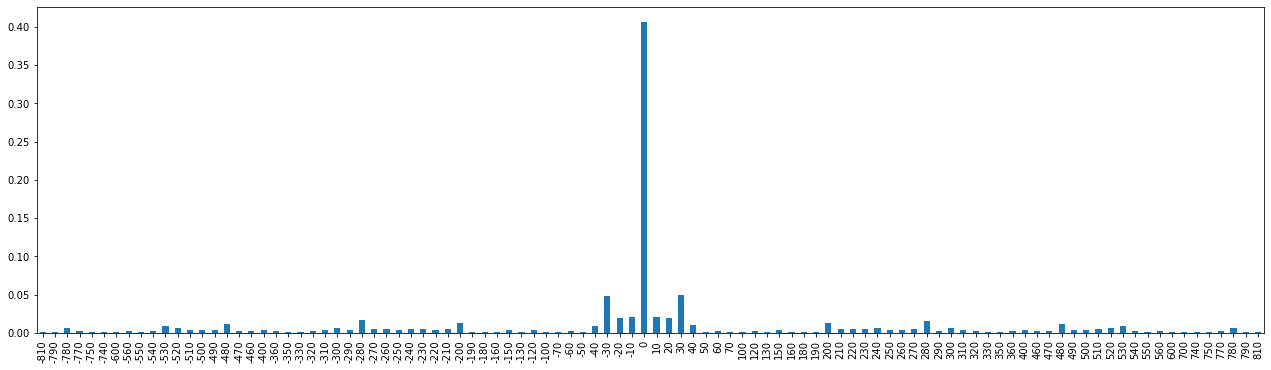

In [9]:
df['Par_var'].value_counts(normalize=True).nlargest(100).sort_index().plot(kind='bar',figsize=(22,6))

In [10]:
# takes 40s
# Create columns of double dummy by direction by suit. e.g. DD_N_C.
def Augment_DDmakes(ddmakes, prefix):
    ddmakesd = defaultdict(list)
    for dd in ddmakes:
        for direction,nesw in zip(mlBridgeLib.NESW,dd):
            for suit,cdhsn in zip(mlBridgeLib.CDHSN,nesw):
                assert cdhsn is not None
                ddmakesd['_'.join([prefix,direction,suit])].append(cdhsn)
    return ddmakesd

ddmakesd = Augment_DDmakes(df['DDmakes_nwse'],'DD_nwse')
ddmakesdf = pd.DataFrame(ddmakesd,dtype='int8')
display(ddmakesdf.dtypes,ddmakesdf.head())
assert len(df) == len(ddmakesdf)
df = pd.concat([df,ddmakesdf],axis='columns') # todo: why is join needed? -- ,join='inner')
del ddmakesdf,ddmakesd
display(df.dtypes,df)

DD_nwse_N_C    int8
DD_nwse_N_D    int8
DD_nwse_N_H    int8
DD_nwse_N_S    int8
DD_nwse_N_N    int8
DD_nwse_E_C    int8
DD_nwse_E_D    int8
DD_nwse_E_H    int8
DD_nwse_E_S    int8
DD_nwse_E_N    int8
DD_nwse_S_C    int8
DD_nwse_S_D    int8
DD_nwse_S_H    int8
DD_nwse_S_S    int8
DD_nwse_S_N    int8
DD_nwse_W_C    int8
DD_nwse_W_D    int8
DD_nwse_W_H    int8
DD_nwse_W_S    int8
DD_nwse_W_N    int8
dtype: object

,DD_nwse_N_C,DD_nwse_N_D,DD_nwse_N_H,DD_nwse_N_S,DD_nwse_N_N,DD_nwse_E_C,DD_nwse_E_D,DD_nwse_E_H,DD_nwse_E_S,DD_nwse_E_N,DD_nwse_S_C,DD_nwse_S_D,DD_nwse_S_H,DD_nwse_S_S,DD_nwse_S_N,DD_nwse_W_C,DD_nwse_W_D,DD_nwse_W_H,DD_nwse_W_S,DD_nwse_W_N
0,9,3,9,3,8,2,10,3,10,2,10,3,9,3,8,2,10,3,10,2
1,8,8,7,7,7,4,5,6,6,5,8,8,7,7,7,4,5,6,6,5
2,8,6,10,4,6,5,7,2,9,4,8,6,10,4,6,5,7,2,9,4
3,2,1,10,8,1,11,11,3,5,11,2,1,10,8,1,11,11,3,5,11
4,7,3,6,2,4,6,10,6,11,8,7,3,6,2,4,6,10,6,11,8


ref                    object
hand_record_id         object
event_id                int64
Board                  string
EventBoard             string
Dealer                 object
Vul                    object
board_record_string    object
Hands                  object
Par                    object
Par_var                 int64
Par_nwse               object
DDmakes                object
DDmakes_nwse           object
DD_N_C                   int8
DD_N_D                   int8
DD_N_H                   int8
DD_N_S                   int8
DD_N_N                   int8
DD_E_C                   int8
DD_E_D                   int8
DD_E_H                   int8
DD_E_S                   int8
DD_E_N                   int8
DD_S_C                   int8
                        ...  
CT_EW_N_Game             bool
CT_EW_N_SSlam            bool
CT_EW_N_GSlam            bool
Vul_NS                   bool
Vul_EW                   bool
DD_nwse_N_C              int8
DD_nwse_N_D              int8
DD_nwse_N_

,ref,hand_record_id,event_id,Board,EventBoard,Dealer,Vul,board_record_string,Hands,Par,Par_var,Par_nwse,DDmakes,DDmakes_nwse,DD_N_C,DD_N_D,DD_N_H,DD_N_S,DD_N_N,DD_E_C,DD_E_D,DD_E_H,DD_E_S,DD_E_N,DD_S_C,DD_S_D,DD_S_H,DD_S_S,DD_S_N,DD_W_C,DD_W_D,DD_W_H,DD_W_S,DD_W_N,Hands_Bin,HB_N,HB_E,HB_S,HB_W,HCP,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,HCP_E,HCP_E_S,HCP_E_H,HCP_E_D,HCP_E_C,HCP_S,HCP_S_S,HCP_S_H,HCP_S_D,HCP_S_C,HCP_W,HCP_W_S,HCP_W_H,HCP_W_D,HCP_W_C,...,CT_NS_H_Game,CT_NS_H_SSlam,CT_NS_H_GSlam,CT_NS_S_Pass,CT_NS_S_Partial,CT_NS_S_Game,CT_NS_S_SSlam,CT_NS_S_GSlam,CT_NS_N_Pass,CT_NS_N_Partial,CT_NS_N_Game,CT_NS_N_SSlam,CT_NS_N_GSlam,CT_EW_C_Pass,CT_EW_C_Partial,CT_EW_C_Game,CT_EW_C_SSlam,CT_EW_C_GSlam,CT_EW_D_Pass,CT_EW_D_Partial,CT_EW_D_Game,CT_EW_D_SSlam,CT_EW_D_GSlam,CT_EW_H_Pass,CT_EW_H_Partial,CT_EW_H_Game,CT_EW_H_SSlam,CT_EW_H_GSlam,CT_EW_S_Pass,CT_EW_S_Partial,CT_EW_S_Game,CT_EW_S_SSlam,CT_EW_S_GSlam,CT_EW_N_Pass,CT_EW_N_Partial,CT_EW_N_Game,CT_EW_N_SSlam,CT_EW_N_GSlam,Vul_NS,Vul_EW,DD_nwse_N_C,DD_nwse_N_D,DD_nwse_N_H,DD_nwse_N_S,DD_nwse_N_N,DD_nwse_E_C,DD_nwse_E_D,DD_nwse_E_H,DD_nwse_E_S,DD_nwse_E_N,DD_nwse_S_C,DD_nwse_S_D,DD_nwse_S_H,DD_nwse_S_S,DD_nwse_S_N,DD_nwse_W_C,DD_nwse_W_D,DD_nwse_W_H,DD_nwse_W_S,DD_nwse_W_N
0,"(acbl, 2620401)",77908,100961,09,200217A_09,N,E_W,ST6HK32DJ2CAJ9874SQJ942H765DT874CQSA853HQDKQ963CK52SK7HAJT984DA5CT63,"((T6, K32, J2, AJ9874), (A853, Q, KQ963, K52), (K7, AJT984, A5, T63), (QJ942, 765, T874, Q))","(200, [(4, S, *, EW, -1)])",300,"(-100, [(5, C, *, S, -1)])","((10, 4, 10, 4, 8), (2, 9, 3, 9, 2), (10, 4, 10, 4, 8), (2, 9, 3, 9, 2))","((9, 3, 9, 3, 8), (2, 10, 3, 10, 2), (10, 3, 9, 3, 8), (2, 10, 3, 10, 2))",10,4,10,4,8,2,9,3,9,2,10,4,10,4,8,2,9,3,9,2,"((0b100010000010000000001100010000000011001011100100, (0b100010000, 0b100000000011, 0b1000000001...",0b100010000010000000001100010000000011001011100100,0b1000001001010001000000000001100100100100100000001001,0b100000100000100111100010010000000010000000100010010,0b11010000101000000011100000001011001000010000000000,"((9, (0, 3, 1, 5)), (14, (4, 2, 5, 3)), (12, (3, 5, 4, 0)), (5, (3, 0, 0, 2)))",9,0,3,1,5,14,4,2,5,3,12,3,5,4,0,5,3,0,0,2,...,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,9,3,9,3,8,2,10,3,10,2,10,3,9,3,8,2,10,3,10,2
1,"(acbl, 2620412)",77908,100961,20,200217A_20,W,Both,ST85HKJDJ43CKJ873SQ32HA643DK96CT94SAJ64HT98DT75CA52SK97HQ752DAQ82CQ6,"((T85, KJ, J43, KJ873), (AJ64, T98, T75, A52), (K97, Q752, AQ82, Q6), (Q32, A643, K96, T94))","(90, [(1, D, , NS, 1), (1, C, , NS, 1), (1, N, , NS, 0)])",0,"(90, [(1, N, , NS, 0), (1, D, , NS, 1), (1, C, , NS, 1)])","((8, 8, 7, 7, 7), (4, 5, 6, 6, 6), (8, 8, 7, 7, 7), (4, 5, 6, 6, 6))","((8, 8, 7, 7, 7), (4, 5, 6, 6, 5), (8, 8, 7, 7, 7), (4, 5, 6, 6, 5))",8,8,7,7,7,4,5,6,6,6,8,8,7,7,7,4,5,6,6,6,"((0b101001000010100000000000010000001100101001100010, (0b101001000, 0b101000000000, 0b1000000110...",0b101001000010100000000000010000001100101001100010,0b1001000010100000011100000000001001010001000000001001,0b100010100000001000010100110100010000010010000010000,0b10000000011100000001011001000100100000000110000100,"((9, (0, 4, 1, 4)), (9, (5, 0, 0, 4)), (13, (3, 2, 6, 2)), (9, (2, 4, 3, 0)))",9,0,4,1,4,9,5,0,0,4,13,3,2,6,2,9,2,4,3,0,...,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,8,8,7,7,7,4,5,6,6,5,8,8,7,7,7,4,5,6,6,5
2,"(acbl, 2620411)",77908,100961,19,200217A_19,S,E_W,STH764DAQ92CQJ653SQJ763HKJTD65CAKTSK984H5DT8743C987SA52HAQ9832DKJC42,"((T, 764, AQ92, QJ653), (K984, 5, T8743, 987), (A52, AQ9832, KJ, 42), (QJ763, KJT, 65, AKT))","(140, [(3, H, , NS, 0)])",-60,"(200, [(4, S, *, EW, -1)])","((9, 7, 9, 4, 6), (4, 6, 3, 8, 6), (9, 7, 9, 5, 6), (4, 6

In [11]:
# takes 3s
for d in mlBridgeLib.CDHSN:
    df['DD_N_'+d+'_var'] = df['DD_N_'+d]-df['DD_nwse_N_'+d]
    df['DD_N_'+d+'_avg'] = df[['DD_N_'+d,'DD_nwse_N_'+d]].mean(axis='columns')
df['DD_N_N_var'].value_counts(), df['DD_N_N_avg'].value_counts()

( 0     1451538
  1      535506
 -1      528744
  2      196476
 -2      192065
 -3       73924
  3       72214
 -4       34185
  4       31826
 -5       10989
  5       10200
  6        3189
 -6        2306
 -7         653
  7         575
  8         113
 -8         105
  10         60
 -9          38
  9          28
 -10         13
 -11          5
  11          3
 Name: DD_N_N_var, dtype: int64,
 6.00     277972
 7.00     260513
 5.00     249391
 8.00     216220
 4.00     202247
 5.50     176258
 6.50     171636
 4.50     156900
 3.00     155510
 7.50     151419
 9.00     141912
 3.50     123446
 8.50     116772
 2.00     112151
 10.00     93706
 2.50      89520
 9.50      83847
 1.00      69217
 11.00     57788
 10.50     52443
 1.50      52431
 12.00     34375
 0.00      29349
 11.50     28186
 0.50      21408
 13.00     11525
 12.50      8613
 Name: DD_N_N_avg, dtype: int64)

<AxesSubplot:>

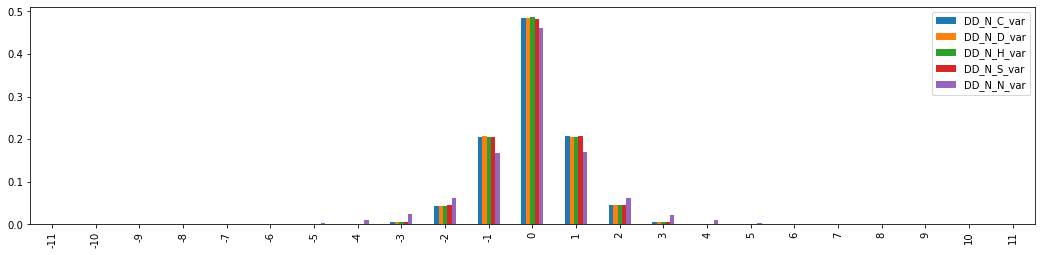

In [12]:
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_var'
    plotd[n] = df[n].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4))

<AxesSubplot:>

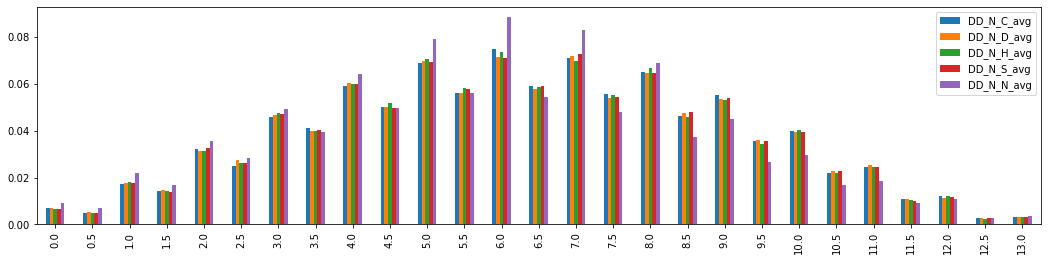

In [13]:
plotd = {}
for d in mlBridgeLib.CDHSN:
    n = 'DD_N_'+d+'_avg'
    plotd[n] = df[n].value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4))

In [14]:
# takes 2s
# todo: use different variable name than df
augmented_df = df.copy()

In [15]:
augmented_df.columns

Index(['ref', 'hand_record_id', 'event_id', 'Board', 'EventBoard', 'Dealer',
       'Vul', 'board_record_string', 'Hands', 'Par',
       ...
       'DD_N_C_var', 'DD_N_C_avg', 'DD_N_D_var', 'DD_N_D_avg', 'DD_N_H_var',
       'DD_N_H_avg', 'DD_N_S_var', 'DD_N_S_avg', 'DD_N_N_var', 'DD_N_N_avg'],
      dtype='object', length=231)

In [16]:
# take 5m
# convert Hands to OHE (One Hot Encoding)
tupled_handsl = augmented_df['Hands']
bin_handsl = mlBridgeLib.HandsLToBin(tupled_handsl)
print(len(bin_handsl),bin_handsl[:2])
ohe_handsl = mlBridgeLib.BinLToOHE(bin_handsl)
print(len(ohe_handsl),ohe_handsl[:2])
assert len(ohe_handsl[0]) == 52*4
retupled_handsl = mlBridgeLib.OHEToHandsL(ohe_handsl)
print(len(retupled_handsl),retupled_handsl[:2])
assert len(tupled_handsl) == len(retupled_handsl)
assert tupled_handsl[0] == retupled_handsl[0]
ohe_handsl[:2]

3144755 [('0b100010000010000000001100010000000011001011100100', '0b1000001001010001000000000001100100100100100000001001', '0b100000100000100111100010010000000010000000100010010', '0b11010000101000000011100000001011001000010000000000'), ('0b101001000010100000000000010000001100101001100010', '0b1001000010100000011100000000001001010001000000001001', '0b100010100000001000010100110100010000010010000010000', '0b10000000011100000001011001000100100000000110000100')]
3144755 [(0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

[(0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,


In [18]:
# takes 2m
# create dataframe of OHE hands
# todo: make restartable using new variable name
ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
augmented_df = pd.concat([augmented_df,ohe_hands_df],axis='columns')
len(augmented_df), augmented_df

(3144755,
                      ref hand_record_id  event_id Board  EventBoard Dealer   Vul                                                   board_record_string                                                                                         Hands                                                                Par  Par_var                                                           Par_nwse                                                                         DDmakes                                                                    DDmakes_nwse  DD_N_C  DD_N_D  DD_N_H  DD_N_S  DD_N_N  DD_E_C  DD_E_D  DD_E_H  DD_E_S  DD_E_N  DD_S_C  DD_S_D  DD_S_H  DD_S_S  DD_S_N  DD_W_C  DD_W_D  DD_W_H  DD_W_S  DD_W_N                                                                                            Hands_Bin                                                    HB_N                                                    HB_E                                                    HB_S             

In [19]:
# takes 2m
# create dataframe of OHE contracts
# todo: make restartable using new variable name
#contractsd = {'DD_N_'+s+'_'+str(l): 1 if l == augmented_df['DD_N_'+s+'_avg'] else 0 for l in range(0,14) for s in mlBridgeLib.CDHSN}
#contractsd 
#ohe_hands_df = pd.DataFrame(ohe_handsl,index=augmented_df.index,columns=[nesw+suit+denom for nesw in mlBridgeLib.NESW for suit in mlBridgeLib.SHDC for denom in mlBridgeLib.ranked_suit],dtype='int8')
#augmented_df = pd.concat([augmented_df,ohe_hands_df],axis='columns')
#len(augmented_df), augmented_df

In [20]:
valid_start, valid_end = "210801","210815"
test_start, test_end = valid_end, "999999"
#valid_start, valid_end = "210601","210701"
#test_start, test_end = valid_end, "999999"

In [21]:
# takes 8s
augmented_df['Valid'] = augmented_df['EventBoard'].between(valid_start,valid_end,inclusive='left')
sum(augmented_df['Valid'])

84325

In [22]:
# takes 10s
# remove test dataset from df
augmented_df['Test'] = augmented_df['EventBoard'].between(test_start,test_end,inclusive='left')
test = augmented_df[augmented_df['Test']].copy()
augmented_df = augmented_df[~augmented_df['Test']].copy()
len(augmented_df),len(test),sum(test['Test'])

(3049864, 94891, 94891)

In [94]:
# takes 4m-14m
import fastai.tabular.all

# dependent variable column names
dep_vars = ['DD_N_C_avg', 'DD_N_D_avg', 'DD_N_H_avg', 'DD_N_S_avg', 'DD_N_N_avg']
dep_vars += ['HCP_E', 'HCP_S', 'HCP_W']
dep_vars += ['QT_S', 'QT_S_S', 'QT_S_H', 'QT_S_D', 'QT_S_C']
dep_vars += ['SL_S_S', 'SL_S_H', 'SL_S_D', 'SL_S_C']
display("dep_vars:",dep_vars)

# continuous valued column names
cont_names = ['Vul_NS', 'Vul_EW']
#cont_names += ['HCP_NS', 'HCP_EW']
cont_names += ['HCP_N'] #, 'HCP_S']
cont_names += ['HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C']
#cont_names += ['HCP_S_S', 'HCP_S_H', 'HCP_S_D', 'HCP_S_C']
#cont_names += ['HCP_E_S', 'HCP_E_H', 'HCP_E_D', 'HCP_E_C']
#cont_names += ['HCP_W_S', 'HCP_W_H', 'HCP_W_D', 'HCP_W_C']
cont_names += ['QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C']
cont_names += ['SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C']
cont_names += [direction+suit+card for direction in ['N'] for suit in mlBridgeLib.SHDC for card in mlBridgeLib.ranked_suit if direction+suit+card in ohe_hands_df]
#cont_names += ohe_hands_df.columns.to_list()

# categorical valued column names. fastai wants ints.
# better?
#cat_names = list(df.select_dtypes(['category']).columns)
#df[cat_names] = df[cat_names].apply(lambda x: x.cat.codes)
cat_names = ['SL_Max_NS', 'SL_Max_EW']

#split = fastai.tabular.all.RandomSplitter(valid_pct=0.2)(fastai.tabular.all.range_of(df))
#test = pd.Series(augmented_df['EventBoard'].ge("210701"),name='Test',dtype='bool') # note: using augmented_df instead of df for split
#valid = pd.Series(augmented_df['EventBoard'].between("210601","210701"),name='Valid',dtype='bool') # note: using augmented_df instead of df for split
df = augmented_df[cont_names+cat_names+dep_vars].copy() # pd.concat([augmented_df[cont_names+cat_names],valid],axis='columns')
df.reset_index(drop=True,inplace=True)
display(len(df), df.head())

for n in cat_names:
    df[n] = df[n].cat.codes
cont_names += cat_names
cat_names = []
print(cont_names, cat_names)

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in cont_names:
    if pd.api.types.is_bool_dtype(df[n]):
        df[n] = df[n].astype('uint8')

# special case catagoricals: catagoricals which are to be made into continuous
#df = df.astype({'Par_Score':'int16'})

#assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names)
assert len(set(cont_names+cat_names+dep_vars)) == len(cont_names+cat_names+dep_vars)
for n in df:
    assert n in cont_names+cat_names+dep_vars, n
    assert not pd.api.types.is_bool_dtype(df[n]), n # TabularDataLoaders.from_df has bug which disallows bool
    assert not pd.api.types.is_object_dtype(df[n]), n
for n in cont_names+cat_names+dep_vars:
    assert n in df

# create fastai dataloader
procs = [fastai.tabular.all.Normalize] # fastai.tabular.all.Categorify, fastai.tabular.all.FillMissing, 
y_names = dep_vars
# valid_idx specifies a list of indexes to validation rows.
#assert pd.api.types.is_bool_dtype(df['Valid'])
valid_idx = df[augmented_df['Valid'].values].index # using augmented_df
assert max(valid_idx) < len(df)
bs = 1024 # fastai results weird out at > 1024 (on 1660ti).
device = 'cuda' # 'cuda' or 'cpu'
# interaction problem between specifying all cont_names, cat_names and valid_idx.

dls = fastai.tabular.all.TabularDataLoaders.from_df(df, proc=procs, cont_names=cont_names, cat_names=cat_names,
    y_names=y_names, valid_idx=valid_idx, bs=bs, device=device, verbose=True) # max is len(df)-len(valid_idx)

# create fastai tabular_learner from dataloader
layers = [8192, 8192, 4096, 4096, 2048, 2048, 1024, 1024, 512, 512, 256, 256, 128, 128, 64, 64, 32, 32, 16, 16]
metrics = fastai.tabular.all.accuracy_multi if len(y_names) else fastai.tabular.all.accuracy
learn = fastai.tabular.all.tabular_learner(dls, layers=layers, metrics=metrics)

# fit data
learn.fit(1)

'dep_vars:'

['DD_N_C_avg',
 'DD_N_D_avg',
 'DD_N_H_avg',
 'DD_N_S_avg',
 'DD_N_N_avg',
 'HCP_E',
 'HCP_S',
 'HCP_W',
 'QT_S',
 'QT_S_S',
 'QT_S_H',
 'QT_S_D',
 'QT_S_C',
 'SL_S_S',
 'SL_S_H',
 'SL_S_D',
 'SL_S_C']

3049864

,Vul_NS,Vul_EW,HCP_N,HCP_N_S,HCP_N_H,HCP_N_D,HCP_N_C,QT_N_S,QT_N_H,QT_N_D,QT_N_C,SL_N_S,SL_N_H,SL_N_D,SL_N_C,NSA,NSK,NSQ,NSJ,NST,NS9,NS8,NS7,NS6,NS5,NS4,NS3,NS2,NHA,NHK,NHQ,NHJ,NHT,NH9,NH8,NH7,NH6,NH5,NH4,NH3,NH2,NDA,NDK,NDQ,NDJ,NDT,ND9,ND8,ND7,ND6,ND5,ND4,ND3,ND2,NCA,NCK,NCQ,NCJ,NCT,NC9,NC8,NC7,NC6,NC5,NC4,NC3,NC2,SL_Max_NS,SL_Max_EW,DD_N_C_avg,DD_N_D_avg,DD_N_H_avg,DD_N_S_avg,DD_N_N_avg,HCP_E,HCP_S,HCP_W,QT_S,QT_S_S,QT_S_H,QT_S_D,QT_S_C,SL_S_S,SL_S_H,SL_S_D,SL_S_C
0,False,True,9,0,3,1,5,0.00,0.50,0.00,1.00,2,3,2,6,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,SL_NS_H,SL_EW_S,9.50,3.50,9.50,3.50,8.00,14,12,5,2.50,0.50,1.00,1.00,0.00,2,6,2,3
1,True,True,9,0,4,1,4,0.00,0.50,0.00,0.50,3,2,3,5,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,SL_NS_D,SL_EW_S,8.00,8.00,7.00,7.00,7.00,9,13,9,2.00,0.50,0.00,1.50,0.00,3,4,4,2
2,False,True,9,0,0,6,3,0.00,0.00,1.50,0.00,1,3,4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,SL_NS_H,SL_EW_S,8.50,6.50,9.50,4.00,6.00,3,14,14,3.00,1.00,1.50,0.50,0.00,3,6,2,2
3,True,False,5,0,3,1,1,0.00,0.00,0.00,0.00,1,6,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,SL_NS_H,SL_EW_D,1.50,0.50,10.00,8.00,1.00,21,7,7,1.50,1.00,0.50,0.00,0.00,7,4,1,1
4,True,True,9,0,2,0,7,0.00,0.00,0.00,2.00,1,5,2,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,SL_NS_H,SL_EW_S,6.50,2.50,6.00,1.50,3.50,11,4,16,0.00,0.00,0.00,0.00,0.00,3,3,4,3


['Vul_NS', 'Vul_EW', 'HCP_N', 'HCP_N_S', 'HCP_N_H', 'HCP_N_D', 'HCP_N_C', 'QT_N_S', 'QT_N_H', 'QT_N_D', 'QT_N_C', 'SL_N_S', 'SL_N_H', 'SL_N_D', 'SL_N_C', 'NSA', 'NSK', 'NSQ', 'NSJ', 'NST', 'NS9', 'NS8', 'NS7', 'NS6', 'NS5', 'NS4', 'NS3', 'NS2', 'NHA', 'NHK', 'NHQ', 'NHJ', 'NHT', 'NH9', 'NH8', 'NH7', 'NH6', 'NH5', 'NH4', 'NH3', 'NH2', 'NDA', 'NDK', 'NDQ', 'NDJ', 'NDT', 'ND9', 'ND8', 'ND7', 'ND6', 'ND5', 'ND4', 'ND3', 'ND2', 'NCA', 'NCK', 'NCQ', 'NCJ', 'NCT', 'NC9', 'NC8', 'NC7', 'NC6', 'NC5', 'NC4', 'NC3', 'NC2', 'SL_Max_NS', 'SL_Max_EW'] []
Setting up after_item: Pipeline: 
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: ReadTabBatch


epoch,train_loss,valid_loss,accuracy_multi,time
0,3.732846,4.479871,0.858955,07:04


In [95]:
assert all(df[augmented_df['Valid'].values].index == valid_idx)

In [96]:
def AppendPredictionsToDF(df, preds):
    valid_idx = df.index
    df_preds = pd.concat([df,pd.DataFrame(preds,index=valid_idx,columns=[n+'_pred' for n in y_names])],axis='columns')
    for n in y_names:
        df_preds.loc[valid_idx,n+'_var'] = df_preds[n]-df_preds[n+'_pred']
        # todo: use SL_Max_NS column as an index into 'DD_N_?', 'DD_N_?_pred', 'DD_N_?_var' to get max for each row
        #for sl in ['SL_Max_NS','SL_Max_EW']:
        #df_preds.loc[valid_idx,n+'_actual'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_pred'] = df_preds.loc[valid_idx].apply(lambda r: r[[n+'_avg_pred'][int(r[sl])]],axis='columns')
        #df_preds.loc[valid_idx,n+'_avg_var'] = df_preds.loc[valid_idx,n+'_avg_actual']-df_preds.loc[valid_idx,n+'_avg_pred']
    return df_preds

In [97]:
# takes 2s
# get validation dataset predictions
preds, actuals = learn.get_preds() # defaults to learn.dls.valid
len(preds), len(actuals), preds, actuals

(84325,
 84325,
 tensor([[5.3763, 9.5468, 6.8787,  ..., 3.6983, 4.0526, 1.6974],
         [3.6077, 6.2571, 5.9892,  ..., 3.5077, 3.2845, 1.9652],
         [6.3038, 8.7025, 4.1043,  ..., 2.5830, 4.2695, 2.8813],
         ...,
         [4.7813, 2.8280, 7.6521,  ..., 3.3190, 2.8864, 4.0016],
         [4.3203, 5.5955, 6.1023,  ..., 3.5345, 2.9456, 2.3262],
         [6.0390, 3.5908, 8.0862,  ..., 4.7046, 1.8115, 2.9741]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [98]:
pd.concat([pd.DataFrame(actuals),pd.DataFrame(preds)],axis='columns')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,4.50,6.00,3.00,4.50,3.50,12.00,5.00,15.00,1.00,1.00,0.00,0.00,0.00,5.00,4.00,3.00,1.00,5.38,9.55,6.88,7.25,7.21,9.01,13.10,8.54,2.60,0.71,0.75,0.75,0.38,3.44,3.70,4.05,1.70
1,7.00,7.50,7.50,12.00,7.50,9.00,16.00,8.00,3.00,0.50,1.00,1.50,0.00,3.00,5.00,5.00,0.00,3.61,6.26,5.99,7.56,5.27,10.74,10.18,10.52,1.84,0.59,0.53,0.46,0.27,4.22,3.51,3.28,1.97
2,5.00,7.00,3.50,4.00,3.50,16.00,8.00,9.00,1.00,1.00,0.00,0.00,0.00,4.00,2.00,6.00,1.00,6.30,8.70,4.10,6.18,6.07,10.19,11.07,9.84,2.07,0.51,0.42,0.67,0.46,3.31,2.58,4.27,2.88
3,8.50,6.50,8.50,9.50,7.50,8.00,12.00,7.00,3.00,1.50,1.50,0.00,0.00,6.00,2.00,1.00,4.00,7.67,5.61,7.38,8.95,7.31,9.17,9.37,9.43,1.64,0.65,0.54,0.15,0.27,5.08,4.29,1.63,2.46
4,2.00,8.50,2.50,3.00,6.50,13.00,9.00,10.00,2.00,0.00,0.00,2.00,0.00,3.00,1.00,7.00,2.00,4.99,7.95,3.15,5.29,4.89,10.95,8.92,11.14,1.53,0.40,0.15,0.56,0.42,3.16,1.72,4.54,3.52
5,11.00,8.50,9.00,11.00,11.00,6.00,14.00,4.00,2.00,2.00,0.00,0.00,0.00,6.00,1.00,3.00,3.00,10.30,5.76,8.51,7.76,8.33,7.85,8.47,8.37,1.42,0.31,0.29,0.21,0.59,2.90,2.66,2.57,5.01
6,7.50,3.00,5.00,1.50,3.50,12.00,5.00,15.00,0.50,0.00,0.00,0.50,0.00,3.00,5.00,2.00,3.00,8.11,5.84,4.98,3.50,5.12,11.14,9.56,10.28,1.66,0.35,0.62,0.34,0.34,2.69,4.37,2.94,3.10
7,7.50,7.00,7.00,7.50,6.00,9.00,8.00,12.00,2.00,2.00,0.00,0.00,0.00,5.00,3.00,1.00,4.00,6.52,6.73,4.42,8.04,6.19,9.96,10.24,9.82,1.85,0.65,0.39,0.43,0.40,4.25,2.69,3.15,2.99
8,4.50,5.50,4.50,7.00,4.50,11.00,9.00,12.00,1.50,0.50,0.50,0.00,0.50,4.00,4.00,1.00,4.00,5.41,5.84,3.79,7.52,5.17,11.13,10.91,10.84,2.00,0.61,0.36,0.55,0.51,3.87,2.38,3.59,3.36
9,12.00,10.00,11.00,5.00,8.00,10.00,6.00,3.00,0.50,0.00,0.50,0.00,0.00,1.00,5.00,4.00,3.00,9.53,8.79,10.23,7.70,9.74,6.46,5.75,6.60,0.71,0.14,0.37,0.08,0.09,2.67,4.39,2.93,2.88


In [99]:
# create dataframe of predictions
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

84325

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
6363,4.50,5.38,-0.88,6.00,9.55,-3.55,3.00,6.88,-3.88,3.50,7.21,-3.71,4.50,7.25,-2.75,12,9.01,2.99,8,8,0,0,0,5,13.10,-8.10,15,8.54,6.46,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,2.00,0.00,0.00,0.00,1.00,0.00,0.38,-0.38,0.00,0.75,-0.75,0.00,0.75,-0.75,1.00,0.71,0.29,2.60,-1.60,0,1,4,5,2,2,1,1.70,-0.70,3,4.05,-1.05,4,3.70,0.30,5,3.44,1.56,1,1
6364,7.00,3.61,3.39,7.50,6.26,1.24,7.50,5.99,1.51,7.50,5.27,2.23,12.00,7.56,4.44,9,10.74,-1.74,7,2,0,0,5,16,10.18,5.82,8,10.52,-2.52,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0.00,0.00,0.00,1.00,3.00,0.00,0.27,-0.27,1.50,0.46,1.04,1.00,0.53,0.47,0.50,0.59,-0.09,1.84,1.16,0,3,5,1,1,6,0,1.97,-1.97,5,3.28,1.72,5,3.51,1.49,3,4.22,-1.22,1,1
6365,5.00,6.30,-1.30,7.00,8.70,-1.70,3.50,4.10,-0.60,3.50,6.07,-2.57,4.00,6.18,-2.18,16,10.19,5.81,7,4,0,3,0,8,11.07,-3.07,9,9.84,-0.84,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1.00,0.00,0.50,0.00,1.00,0.00,0.46,-0.46,0.00,0.67,-0.67,0.00,0.42,-0.42,1.00,0.51,0.49,2.07,-1.07,2,1,6,2,3,2,1,2.88,-1.88,6,4.27,1.73,2,2.58,-0.58,4,3.31,0.69,1,1
6366,8.50,7.67,0.83,6.50,5.61,0.89,8.50,7.38,1.12,7.50,7.31,0.19,9.50,8.95,0.55,8,9.17,-1.17,13,6,6,1,0,12,9.37,2.63,7,9.43,-2.43,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.00,1.50,0.00,0.00,3.00,0.00,0.27,-0.27,0.00,0.15,-0.15,1.50,0.54,0.96,1.50,0.65,0.85,1.64,1.36,1,3,3,4,5,1,4,2.46,1.54,1,1.63,-0.63,2,4.29,-2.29,6,5.08,0.92,1,1
6367,2.00,4.99,-2.99,8.50,7.95,0.55,2.50,3.15,-0.65,6.50,4.89,1.61,3.00,5.29,-2.29,13,10.95,2.05,8,1,0,4,3,9,8.92,0.08,10,11.14,-1.14,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.00,0.00,1.00,0.50,2.00,0.00,0.42,-0.42,2.00,0.56,1.44,0.00,0.15,-0.15,0.00,0.40,-0.40,1.53,0.47,2,1,3,3,4,3,2,3.52,-1.52,7,4.54,2.46,1,1.72,-0.72,3,3.16,-0.16,1,1
6368,11.00,10.30,0.70,8.50,5.76,2.74,9.00,8.51,0.49,11.00,8.33,2.67,11.00,7.76,3.24,6,7.85,-1.85,16,5,7,4,0,14,8.47,5.53,4,8.37,-4.37,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.00,2.00,0.50,0.00,2.00,0.00,0.59,-0.59,0.00,0.21,-0.21,0.00,0.29,-0.29,2.00,0.31,1.69,1.42,0.58,1,0,5,2,5,1,3,5.01,-2.01,3,2.57,0.43,1,2.66,-1.66,6,2.90,3.10,1,1
6369,7.50,8.11,-0.61,3.00,5.84,-2.84,5.00,4.98,0.02,3.50,5.12,-1.62,1.50,3.50,-2.00,12,11.14,0.86,8,8,0,0,0,5,9.56,-4.56,15,10.28,4.72,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.00,0.00,0.00,0.00,0.50,0.00,0.34,-0.34,0.50,0.34,0.16,0.00,0.62,-0.62,0.00,0.35,-0.35,1.66,-1.16,3,0,6,4,2,1,3,3.10,-0.10,2,2.94,-0.94,5,4.37,0.63,3,2.69,0.31,1,1
6370,7.50,6.52,0.98,7.00,6.73,0.27,7.00,4.42,2.58,6.00,6.19,-0.19,7.50,8.04,-0.54,9,9.96,-0.96,11,0,7,3,1,8,10.24,-2.24,12,9.82,2.18,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,2.00,0.50,0.00,2.00,0.00,0.40,-0.40,0.00,0.43,-0.43

In [100]:
hcp_cols = ['HCP_N' if s == 'N' else 'HCP_'+s+'_pred' for s in mlBridgeLib.NESW]
df_preds['HCP_sum'] = df_preds[hcp_cols].sum(axis='columns')
df_preds['HCP_sum_var'] = 40-df_preds['HCP_sum']
df_preds[hcp_cols+['HCP_sum','HCP_sum_var']]

,HCP_N,HCP_E_pred,HCP_S_pred,HCP_W_pred,HCP_sum,HCP_sum_var
6363,8,9.01,13.10,8.54,38.65,1.35
6364,7,10.74,10.18,10.52,38.43,1.57
6365,7,10.19,11.07,9.84,38.10,1.90
6366,13,9.17,9.37,9.43,40.97,-0.97
6367,8,10.95,8.92,11.14,39.01,0.99
6368,16,7.85,8.47,8.37,40.68,-0.68
6369,8,11.14,9.56,10.28,38.98,1.02
6370,11,9.96,10.24,9.82,41.02,-1.02
6371,8,11.13,10.91,10.84,40.88,-0.88
6372,21,6.46,5.75,6.60,39.81,0.19


<AxesSubplot:>

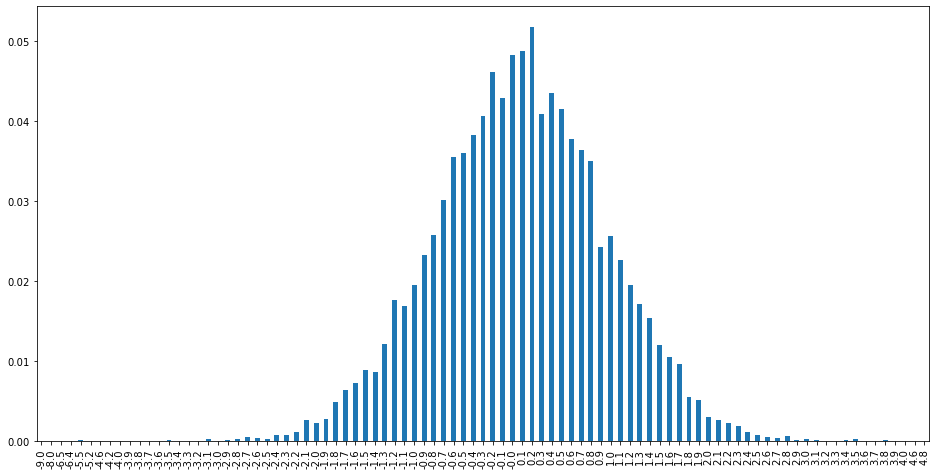

In [101]:
# predicted variance of HCP from 40
df_preds['HCP_sum_var'].astype('float').round(1).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:>

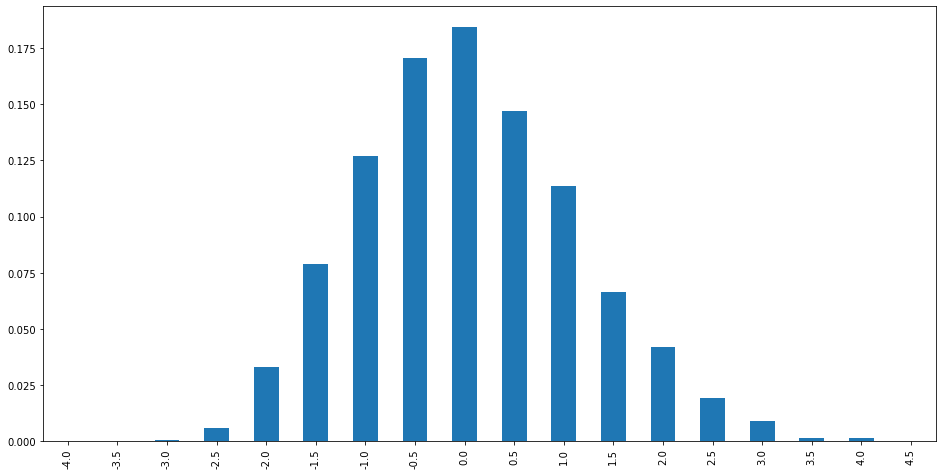

In [120]:
# predicted QT variance
df_preds['QT_S_var'].astype('float').div(5).round(1).mul(5).value_counts(normalize=True).sort_index().plot(kind='bar',figsize=(16,8))

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

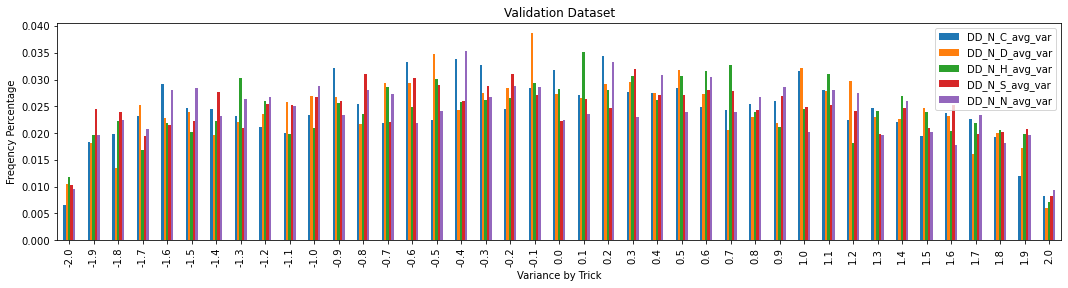

In [102]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

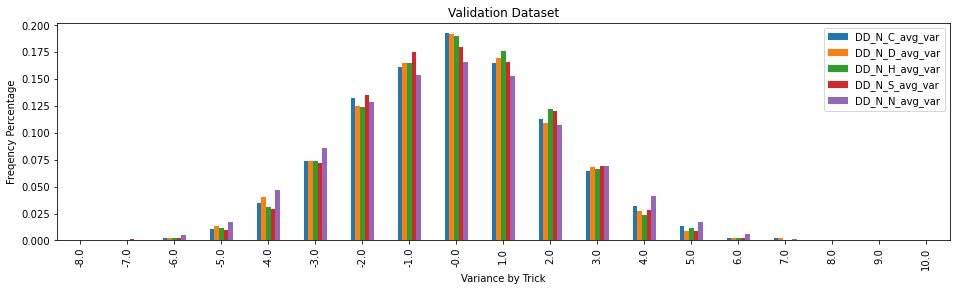

In [103]:
# plot variance 1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('DD')]:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by HCP', ylabel='Frequency Percentage'>

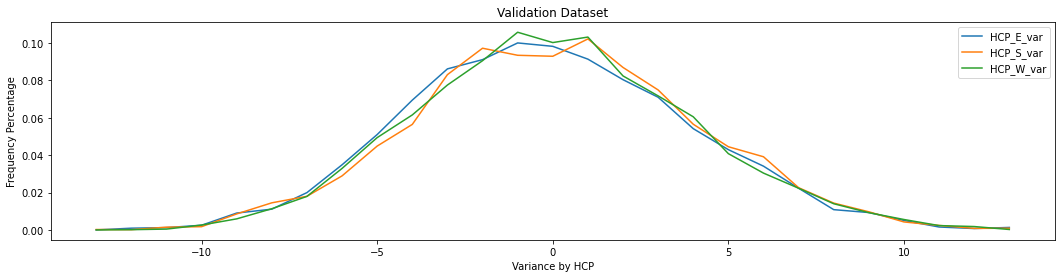

In [104]:
# plot variance .1 trick precision
plotd = {}
for n in [n for n in y_names if n.startswith('HCP')]:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-13,13)].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(figsize=(18,4), xlabel='Variance by HCP', ylabel='Frequency Percentage', title='Validation Dataset')

In [105]:
testdf = test[cont_names+cat_names+dep_vars].copy()
# need to transform columns for inference too
for n in testdf:
    if pd.api.types.is_categorical_dtype(testdf[n]):
        testdf[n] = testdf[n].cat.codes

# current fastai/pytorch has a bug where bool is treated as object and thus erroring out.
for n in testdf:
    if pd.api.types.is_bool_dtype(testdf[n]):
        testdf[n] = testdf[n].astype('uint8')

In [106]:
testdf.dtypes

Vul_NS          uint8
Vul_EW          uint8
HCP_N            int8
HCP_N_S          int8
HCP_N_H          int8
HCP_N_D          int8
HCP_N_C          int8
QT_N_S        float32
QT_N_H        float32
QT_N_D        float32
QT_N_C        float32
SL_N_S           int8
SL_N_H           int8
SL_N_D           int8
SL_N_C           int8
NSA              int8
NSK              int8
NSQ              int8
NSJ              int8
NST              int8
NS9              int8
NS8              int8
NS7              int8
NS6              int8
NS5              int8
               ...   
NC7              int8
NC6              int8
NC5              int8
NC4              int8
NC3              int8
NC2              int8
SL_Max_NS        int8
SL_Max_EW        int8
DD_N_C_avg    float64
DD_N_D_avg    float64
DD_N_H_avg    float64
DD_N_S_avg    float64
DD_N_N_avg    float64
HCP_E            int8
HCP_S            int8
HCP_W            int8
QT_S          float32
QT_S_S        float32
QT_S_H        float32
QT_S_D    

In [107]:
# takes 10s
# get predictions for test (as opposed to validation) dataset
dl_test = learn.dls.test_dl(testdf, with_labels=True)
preds, actuals = learn.get_preds(dl=dl_test)
len(preds), len(actuals), preds, actuals

(94891,
 94891,
 tensor([[ 3.3317,  5.9186,  8.0832,  ...,  4.1874,  3.5655,  2.2851],
         [ 3.7937,  6.1606,  6.2844,  ...,  3.0767,  3.6042,  2.4157],
         [ 6.6726,  4.8741,  7.8016,  ...,  3.1386,  2.6373,  3.5055],
         ...,
         [ 8.9439,  8.4527, 10.2098,  ...,  3.8205,  3.1785,  3.4983],
         [ 6.9111,  4.4779,  2.4759,  ...,  2.8951,  3.1733,  3.9865],
         [ 9.7125,  7.4665,  7.4179,  ...,  3.4075,  3.3335,  4.1884]]),
 tensor([[ 3.0000,  3.5000,  9.5000,  ...,  6.0000,  2.0000,  3.0000],
         [ 2.5000,  3.0000,  3.5000,  ...,  2.0000,  5.0000,  1.0000],
         [ 5.5000,  2.5000,  6.5000,  ...,  4.0000,  2.0000,  4.0000],
         ...,
         [ 9.0000, 11.5000, 11.0000,  ...,  4.0000,  3.0000,  4.0000],
         [ 7.0000,  5.0000,  0.0000,  ...,  3.0000,  2.0000,  6.0000],
         [ 8.5000,  8.0000,  7.5000,  ...,  4.0000,  3.0000,  4.0000]]))

In [108]:
pd.concat([testdf[dep_vars],pd.DataFrame(preds,index=testdf.index)],axis='columns')

,DD_N_C_avg,DD_N_D_avg,DD_N_H_avg,DD_N_S_avg,DD_N_N_avg,HCP_E,HCP_S,HCP_W,QT_S,QT_S_S,QT_S_H,QT_S_D,QT_S_C,SL_S_S,SL_S_H,SL_S_D,SL_S_C,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
221,3.00,3.50,9.50,4.50,4.00,10,10,13,2.00,1.00,1.00,0.00,0.00,2,6,2,3,3.33,5.92,8.08,5.58,5.14,11.08,11.31,10.86,2.13,0.48,0.72,0.56,0.33,3.02,4.19,3.57,2.29
222,2.50,3.00,3.50,5.00,2.50,11,1,18,0.00,0.00,0.00,0.00,0.00,5,2,5,1,3.79,6.16,6.28,8.09,5.54,10.34,7.44,10.28,1.13,0.31,0.25,0.37,0.22,3.90,3.08,3.60,2.42
223,5.50,2.50,6.50,7.50,5.50,11,5,9,0.00,0.00,0.00,0.00,0.00,3,4,2,4,6.67,4.87,7.80,8.83,6.92,8.79,7.39,9.02,1.14,0.26,0.24,0.24,0.41,3.61,3.14,2.64,3.51
224,5.00,2.00,5.00,3.00,3.00,9,4,17,1.00,0.00,1.00,0.00,0.00,3,4,2,4,8.34,3.72,6.16,5.97,5.72,10.37,9.75,10.58,1.74,0.42,0.40,0.27,0.63,3.19,2.85,2.32,4.72
225,7.50,3.00,5.00,6.00,4.00,11,8,12,2.00,1.00,1.00,0.00,0.00,4,3,4,2,8.41,3.74,5.96,6.07,5.70,10.49,9.44,10.35,1.64,0.46,0.51,0.19,0.46,3.50,3.61,2.01,3.92
226,5.00,7.00,7.00,10.00,8.00,12,11,4,2.50,1.50,1.00,0.00,0.00,4,4,3,2,5.47,8.32,7.86,9.57,7.78,8.37,9.15,8.32,1.60,0.50,0.41,0.43,0.26,4.30,3.35,3.33,2.04
227,9.50,7.00,9.00,11.00,9.00,13,12,4,2.00,0.00,1.00,1.00,0.00,4,4,4,1,7.04,5.00,7.39,8.70,6.90,9.01,8.77,9.21,1.49,0.50,0.45,0.20,0.34,4.40,3.85,1.95,2.81
228,4.50,9.00,6.00,6.00,6.50,9,7,8,1.00,0.00,1.00,0.00,0.00,3,4,5,1,5.43,9.69,7.53,7.70,7.70,8.54,8.22,8.31,1.35,0.32,0.40,0.45,0.14,3.24,3.48,4.13,1.98
229,10.00,4.00,8.00,4.00,8.00,5,14,12,3.50,0.00,0.50,2.00,1.00,2,4,3,4,8.96,4.42,6.40,6.73,6.42,9.96,12.82,9.48,2.51,0.63,0.74,0.44,0.69,3.49,3.68,2.06,3.80
230,6.00,4.00,6.00,6.50,5.00,12,12,10,1.50,0.00,1.00,0.50,0.00,3,3,2,5,5.17,3.35,5.99,7.47,4.94,11.19,10.84,11.04,2.00,0.57,0.53,0.36,0.53,3.84,3.14,2.51,3.47


In [109]:
# takes 13s
# create dataframe with test predictions
df_preds = AppendPredictionsToDF(testdf, preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

94891

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
221,3.00,3.33,-0.33,3.50,5.92,-2.42,9.50,8.08,1.42,4.00,5.14,-1.14,4.50,5.58,-1.08,10,11.08,-1.08,7,0,0,4,3,10,11.31,-1.31,13,10.86,2.14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0.00,0.00,1.00,0.00,2.00,0.00,0.33,-0.33,0.00,0.56,-0.56,1.00,0.72,0.28,1.00,0.48,0.52,2.13,-0.13,0,2,1,4,4,4,3,2.29,0.71,2,3.57,-1.57,6,4.19,1.81,2,3.02,-1.02,1,1
222,2.50,3.79,-1.29,3.00,6.16,-3.16,3.50,6.28,-2.78,2.50,5.54,-3.04,5.00,8.09,-3.09,11,10.34,0.66,10,2,0,4,4,1,7.44,-6.44,18,10.28,7.72,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.00,0.00,1.00,1.00,0.00,0.00,0.22,-0.22,0.00,0.37,-0.37,0.00,0.25,-0.25,0.00,0.31,-0.31,1.13,-1.13,0,3,4,1,5,3,1,2.42,-1.42,5,3.60,1.40,2,3.08,-1.08,5,3.90,1.10,1,1
223,5.50,6.67,-1.17,2.50,4.87,-2.37,6.50,7.80,-1.30,5.50,6.92,-1.42,7.50,8.83,-1.33,11,8.79,2.21,15,2,2,7,4,5,7.39,-2.39,9,9.02,-0.02,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0.00,0.00,2.00,1.00,0.00,0.00,0.41,-0.41,0.00,0.24,-0.24,0.00,0.24,-0.24,0.00,0.26,-0.26,1.14,-1.14,1,3,3,2,3,5,4,3.51,0.49,2,2.64,-0.64,4,3.14,0.86,3,3.61,-0.61,1,1
224,5.00,8.34,-3.34,2.00,3.72,-1.72,5.00,6.16,-1.16,3.00,5.72,-2.72,3.00,5.97,-2.97,9,10.37,-1.37,10,3,0,6,1,4,9.75,-5.75,17,10.58,6.42,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0.00,0.00,1.00,0.00,1.00,0.00,0.63,-0.63,0.00,0.27,-0.27,1.00,0.40,0.60,0.00,0.42,-0.42,1.74,-0.74,1,0,4,2,3,4,4,4.72,-0.72,2,2.32,-0.32,4,2.85,1.15,3,3.19,-0.19,1,1
225,7.50,8.41,-0.91,3.00,3.74,-0.74,5.00,5.96,-0.96,4.00,5.70,-1.70,6.00,6.07,-0.07,11,10.49,0.51,9,3,4,0,2,8,9.44,-1.44,12,10.35,1.65,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0.00,1.00,0.00,0.00,2.00,0.00,0.46,-0.46,0.00,0.19,-0.19,1.00,0.51,0.49,1.00,0.46,0.54,1.64,0.36,1,0,6,1,3,3,2,3.92,-1.92,4,2.01,1.99,3,3.61,-0.61,4,3.50,0.50,1,1
226,5.00,5.47,-0.47,7.00,8.32,-1.32,7.00,7.86,-0.86,8.00,7.78,0.22,10.00,9.57,0.43,12,8.37,3.63,13,3,7,0,3,11,9.15,1.85,4,8.32,-4.32,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0.50,2.00,0.00,0.50,2.50,0.00,0.26,-0.26,0.00,0.43,-0.43,1.00,0.41,0.59,1.50,0.50,1.00,1.60,0.90,0,3,3,3,2,5,2,2.04,-0.04,3,3.33,-0.33,4,3.35,0.65,4,4.30,-0.30,1,1
227,9.50,7.04,2.46,7.00,5.00,2.00,9.00,7.39,1.61,9.00,6.90,2.10,11.00,8.70,2.30,13,9.01,3.99,11,7,0,0,4,12,8.77,3.23,4,9.21,-5.21,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1.50,0.00,0.00,1.00,2.00,0.00,0.34,-0.34,1.00,0.20,0.80,1.00,0.45,0.55,0.00,0.50,-0.50,1.49,0.51,1,3,6,0,2,5,1,2.81,-1.81,4,1.95,2.05,4,3.85,0.15,4,4.40,-0.40,1,1
228,4.50,5.43,-0.93,9.00,9.69,-0.69,6.00,7.53,-1.53,6.50,7.70,-1.20,6.00,7.70,-1.70,9,8.54,0.46,16,5,4,4,3,7,8.22,-1.22,8,8.31,-0.31,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1.00,0.50,1.00,0.00,1.00,0.00,0.14,-0.14,0.00,0.45

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

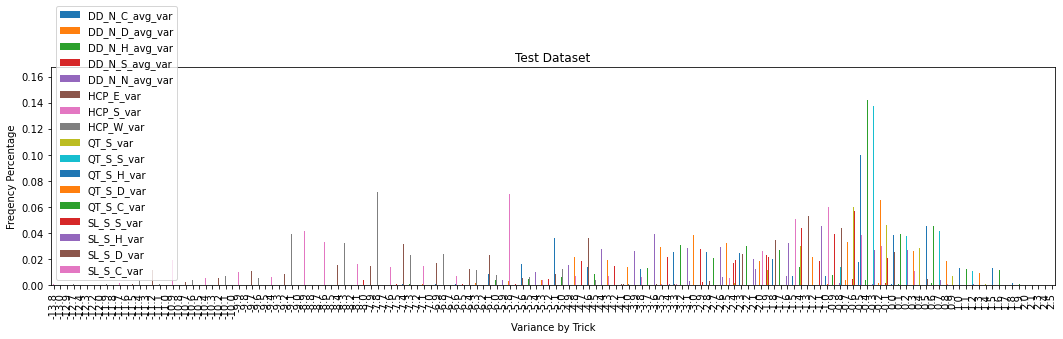

In [110]:
# plot with .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

<AxesSubplot:title={'center':'Test Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

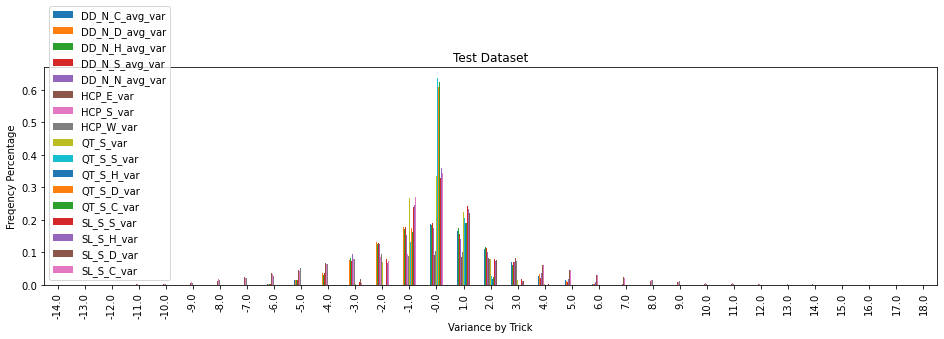

In [111]:
# plot with 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Test Dataset')

In [112]:
# takes 2s
# get validation dataset predictions. Pass passing learn.dls.valid) instead of default ().
preds, actuals = learn.get_preds(dl=learn.dls.valid)
len(preds), len(actuals), preds, actuals

(84325,
 84325,
 tensor([[5.3763, 9.5468, 6.8787,  ..., 3.6983, 4.0526, 1.6974],
         [3.6077, 6.2571, 5.9892,  ..., 3.5077, 3.2845, 1.9652],
         [6.3038, 8.7025, 4.1043,  ..., 2.5830, 4.2695, 2.8813],
         ...,
         [4.7813, 2.8280, 7.6521,  ..., 3.3190, 2.8864, 4.0016],
         [4.3203, 5.5955, 6.1023,  ..., 3.5345, 2.9456, 2.3262],
         [6.0390, 3.5908, 8.0862,  ..., 4.7046, 1.8115, 2.9741]]),
 tensor([[4.5000, 6.0000, 3.0000,  ..., 4.0000, 3.0000, 1.0000],
         [7.0000, 7.5000, 7.5000,  ..., 5.0000, 5.0000, 0.0000],
         [5.0000, 7.0000, 3.5000,  ..., 2.0000, 6.0000, 1.0000],
         ...,
         [6.5000, 3.0000, 7.0000,  ..., 3.0000, 2.0000, 5.0000],
         [5.0000, 3.0000, 5.0000,  ..., 4.0000, 1.0000, 5.0000],
         [5.5000, 0.0000, 5.5000,  ..., 5.0000, 2.0000, 4.0000]]))

In [113]:
# takes 3s
# create dataframe from validation dataset
df_preds = AppendPredictionsToDF(df[augmented_df['Valid'].values], preds)
df_preds.sort_index(axis='columns', inplace=True)
display(len(df_preds), df_preds)

84325

,DD_N_C_avg,DD_N_C_avg_pred,DD_N_C_avg_var,DD_N_D_avg,DD_N_D_avg_pred,DD_N_D_avg_var,DD_N_H_avg,DD_N_H_avg_pred,DD_N_H_avg_var,DD_N_N_avg,DD_N_N_avg_pred,DD_N_N_avg_var,DD_N_S_avg,DD_N_S_avg_pred,DD_N_S_avg_var,HCP_E,HCP_E_pred,HCP_E_var,HCP_N,HCP_N_C,HCP_N_D,HCP_N_H,HCP_N_S,HCP_S,HCP_S_pred,HCP_S_var,HCP_W,HCP_W_pred,HCP_W_var,NC2,NC3,NC4,NC5,NC6,NC7,NC8,NC9,NCA,NCJ,NCK,NCQ,NCT,ND2,ND3,ND4,ND5,ND6,ND7,ND8,ND9,NDA,NDJ,NDK,NDQ,NDT,NH2,NH3,NH4,NH5,NH6,NH7,NH8,NH9,NHA,NHJ,NHK,NHQ,NHT,NS2,NS3,NS4,NS5,NS6,NS7,NS8,NS9,NSA,NSJ,NSK,NSQ,NST,QT_N_C,QT_N_D,QT_N_H,QT_N_S,QT_S,QT_S_C,QT_S_C_pred,QT_S_C_var,QT_S_D,QT_S_D_pred,QT_S_D_var,QT_S_H,QT_S_H_pred,QT_S_H_var,QT_S_S,QT_S_S_pred,QT_S_S_var,QT_S_pred,QT_S_var,SL_Max_EW,SL_Max_NS,SL_N_C,SL_N_D,SL_N_H,SL_N_S,SL_S_C,SL_S_C_pred,SL_S_C_var,SL_S_D,SL_S_D_pred,SL_S_D_var,SL_S_H,SL_S_H_pred,SL_S_H_var,SL_S_S,SL_S_S_pred,SL_S_S_var,Vul_EW,Vul_NS
6363,4.50,5.38,-0.88,6.00,9.55,-3.55,3.00,6.88,-3.88,3.50,7.21,-3.71,4.50,7.25,-2.75,12,9.01,2.99,8,8,0,0,0,5,13.10,-8.10,15,8.54,6.46,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,2.00,0.00,0.00,0.00,1.00,0.00,0.38,-0.38,0.00,0.75,-0.75,0.00,0.75,-0.75,1.00,0.71,0.29,2.60,-1.60,0,1,4,5,2,2,1,1.70,-0.70,3,4.05,-1.05,4,3.70,0.30,5,3.44,1.56,1,1
6364,7.00,3.61,3.39,7.50,6.26,1.24,7.50,5.99,1.51,7.50,5.27,2.23,12.00,7.56,4.44,9,10.74,-1.74,7,2,0,0,5,16,10.18,5.82,8,10.52,-2.52,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0.00,0.00,0.00,1.00,3.00,0.00,0.27,-0.27,1.50,0.46,1.04,1.00,0.53,0.47,0.50,0.59,-0.09,1.84,1.16,0,3,5,1,1,6,0,1.97,-1.97,5,3.28,1.72,5,3.51,1.49,3,4.22,-1.22,1,1
6365,5.00,6.30,-1.30,7.00,8.70,-1.70,3.50,4.10,-0.60,3.50,6.07,-2.57,4.00,6.18,-2.18,16,10.19,5.81,7,4,0,3,0,8,11.07,-3.07,9,9.84,-0.84,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1.00,0.00,0.50,0.00,1.00,0.00,0.46,-0.46,0.00,0.67,-0.67,0.00,0.42,-0.42,1.00,0.51,0.49,2.07,-1.07,2,1,6,2,3,2,1,2.88,-1.88,6,4.27,1.73,2,2.58,-0.58,4,3.31,0.69,1,1
6366,8.50,7.67,0.83,6.50,5.61,0.89,8.50,7.38,1.12,7.50,7.31,0.19,9.50,8.95,0.55,8,9.17,-1.17,13,6,6,1,0,12,9.37,2.63,7,9.43,-2.43,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.00,1.50,0.00,0.00,3.00,0.00,0.27,-0.27,0.00,0.15,-0.15,1.50,0.54,0.96,1.50,0.65,0.85,1.64,1.36,1,3,3,4,5,1,4,2.46,1.54,1,1.63,-0.63,2,4.29,-2.29,6,5.08,0.92,1,1
6367,2.00,4.99,-2.99,8.50,7.95,0.55,2.50,3.15,-0.65,6.50,4.89,1.61,3.00,5.29,-2.29,13,10.95,2.05,8,1,0,4,3,9,8.92,0.08,10,11.14,-1.14,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.00,0.00,1.00,0.50,2.00,0.00,0.42,-0.42,2.00,0.56,1.44,0.00,0.15,-0.15,0.00,0.40,-0.40,1.53,0.47,2,1,3,3,4,3,2,3.52,-1.52,7,4.54,2.46,1,1.72,-0.72,3,3.16,-0.16,1,1
6368,11.00,10.30,0.70,8.50,5.76,2.74,9.00,8.51,0.49,11.00,8.33,2.67,11.00,7.76,3.24,6,7.85,-1.85,16,5,7,4,0,14,8.47,5.53,4,8.37,-4.37,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.00,2.00,0.50,0.00,2.00,0.00,0.59,-0.59,0.00,0.21,-0.21,0.00,0.29,-0.29,2.00,0.31,1.69,1.42,0.58,1,0,5,2,5,1,3,5.01,-2.01,3,2.57,0.43,1,2.66,-1.66,6,2.90,3.10,1,1
6369,7.50,8.11,-0.61,3.00,5.84,-2.84,5.00,4.98,0.02,3.50,5.12,-1.62,1.50,3.50,-2.00,12,11.14,0.86,8,8,0,0,0,5,9.56,-4.56,15,10.28,4.72,1,0,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.00,0.00,0.00,0.00,0.50,0.00,0.34,-0.34,0.50,0.34,0.16,0.00,0.62,-0.62,0.00,0.35,-0.35,1.66,-1.16,3,0,6,4,2,1,3,3.10,-0.10,2,2.94,-0.94,5,4.37,0.63,3,2.69,0.31,1,1
6370,7.50,6.52,0.98,7.00,6.73,0.27,7.00,4.42,2.58,6.00,6.19,-0.19,7.50,8.04,-0.54,9,9.96,-0.96,11,0,7,3,1,8,10.24,-2.24,12,9.82,2.18,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0.00,2.00,0.50,0.00,2.00,0.00,0.40,-0.40,0.00,0.43,-0.43

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

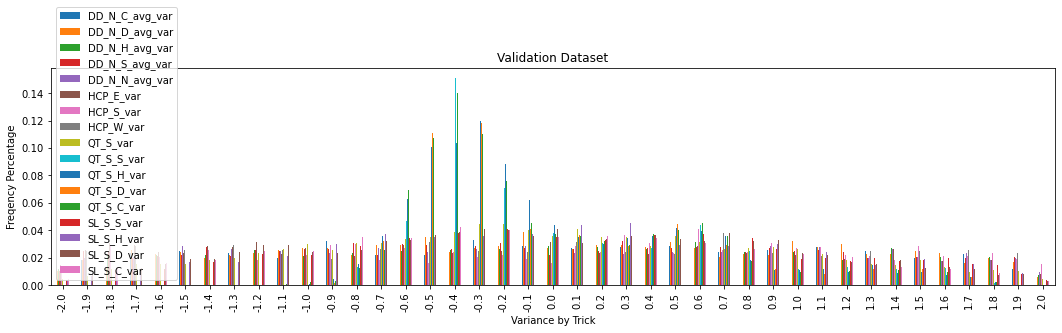

In [114]:
# plot dd variance using .1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'][df_preds[n+'_var'].between(-2,2)].astype('float').round(1).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(18,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

<AxesSubplot:title={'center':'Validation Dataset'}, xlabel='Variance by Trick', ylabel='Freqency Percentage'>

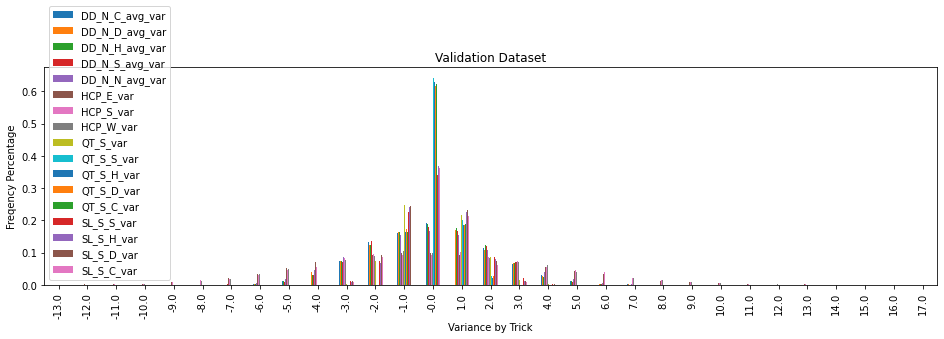

In [115]:
# plot dd variance using 1 trick precision
plotd = {}
for n in y_names:
    plotd[n+'_var'] = df_preds[n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset')

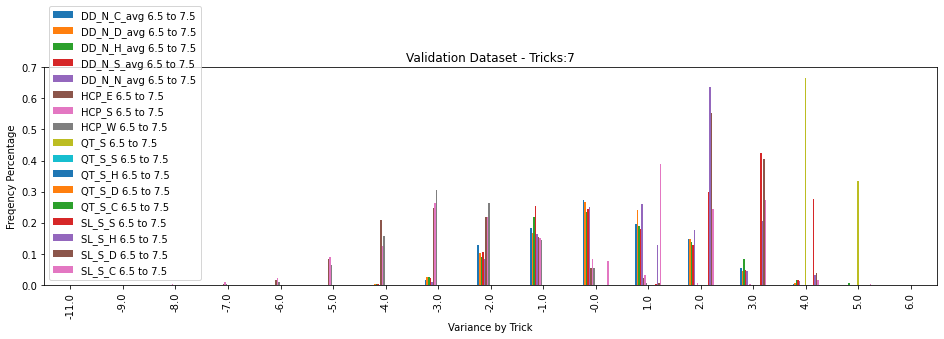

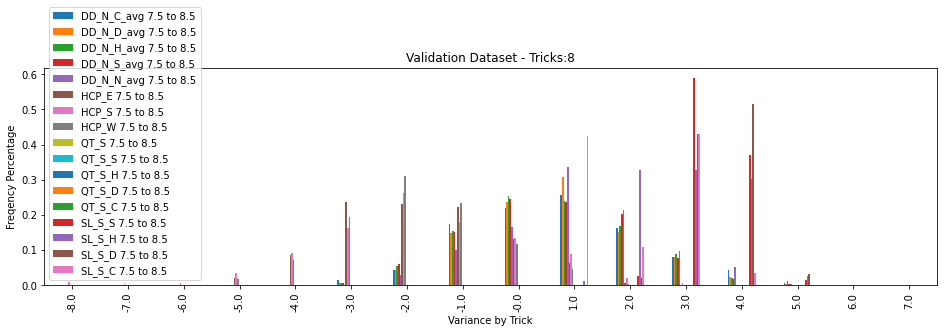

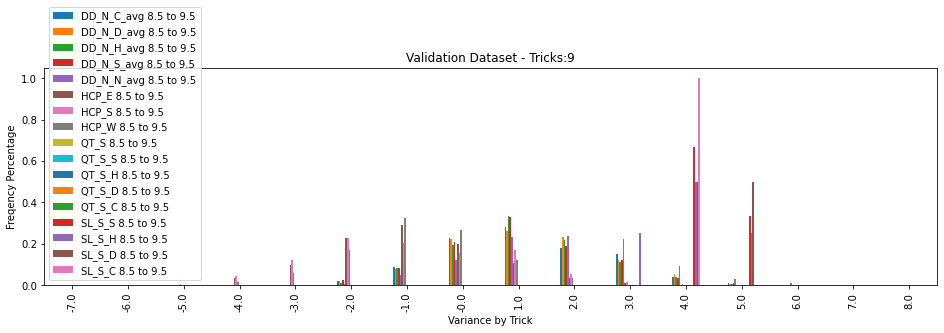

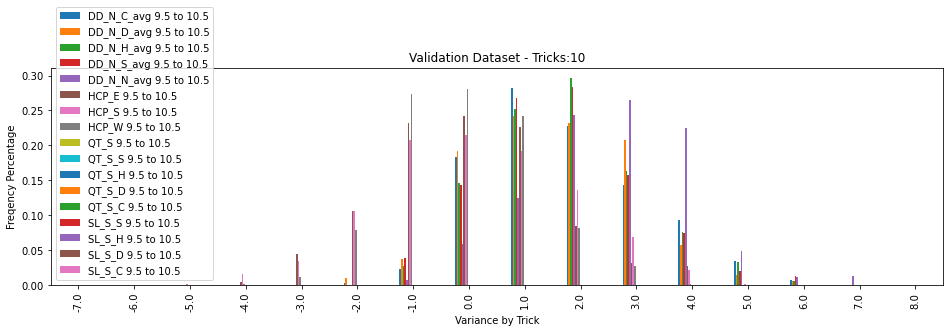

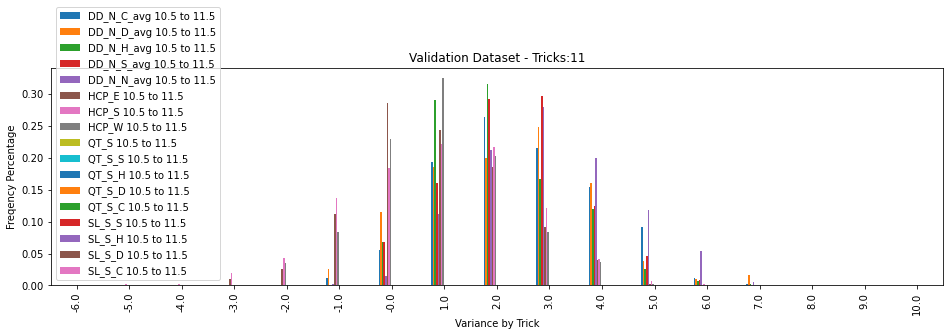

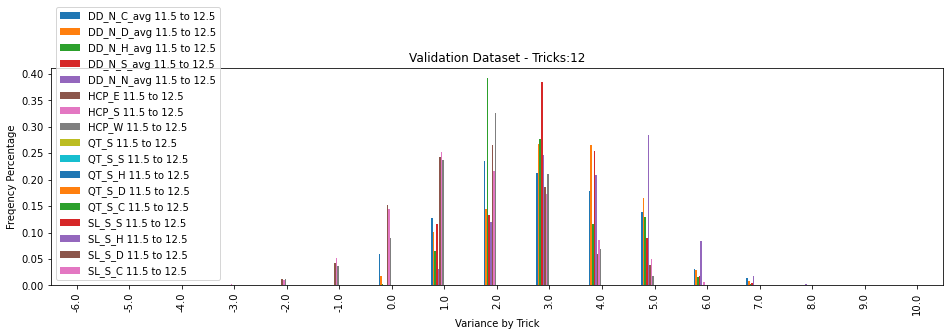

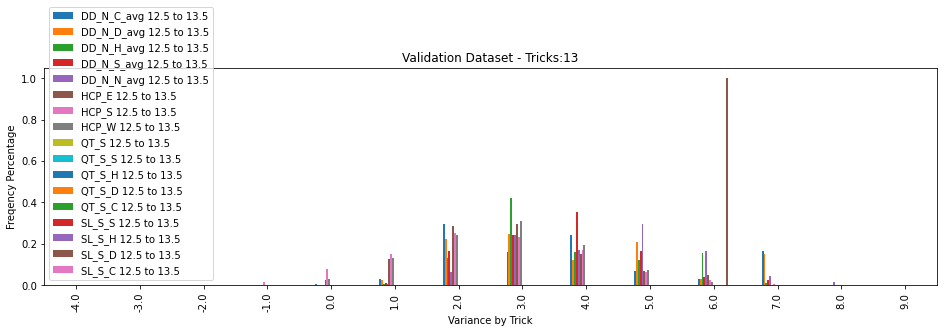

In [116]:
# plot dd variance, by trick count, using 1 trick precision
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').round(0).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))

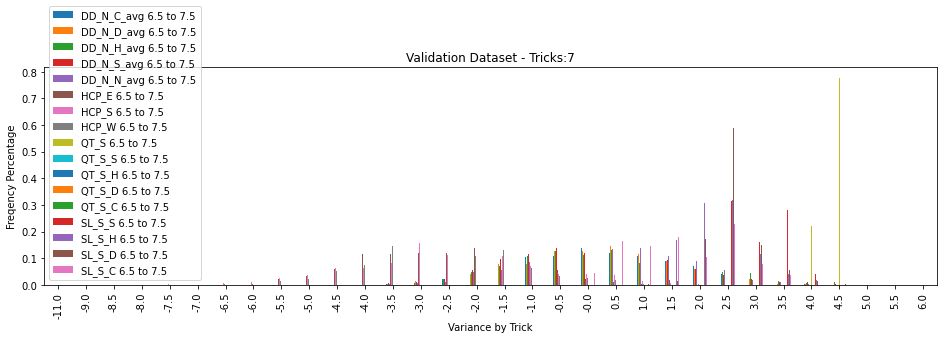

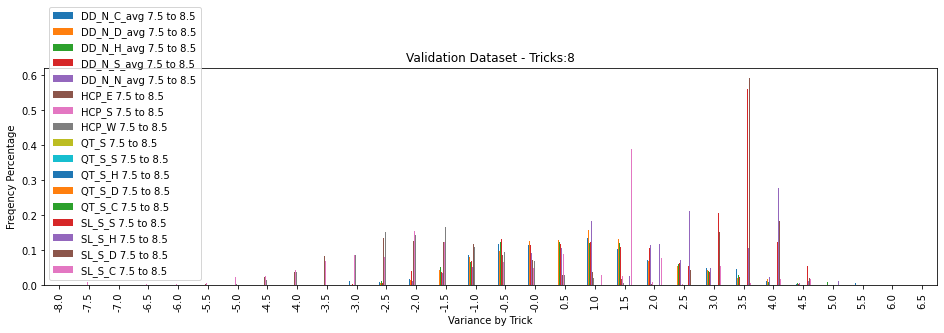

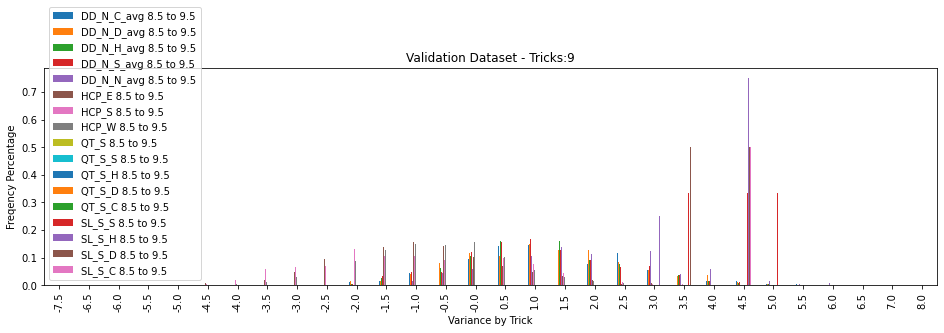

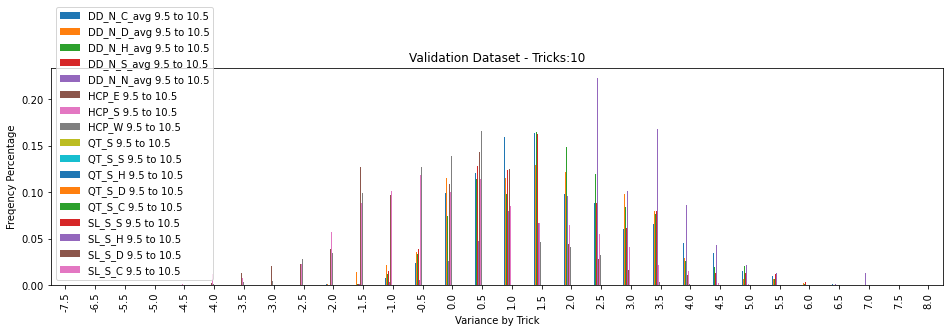

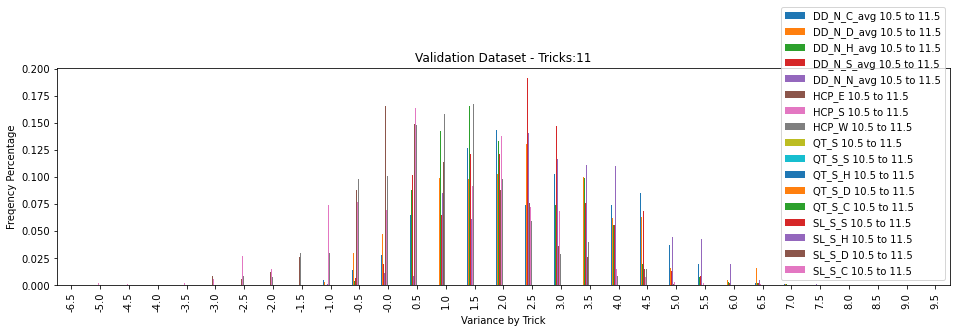

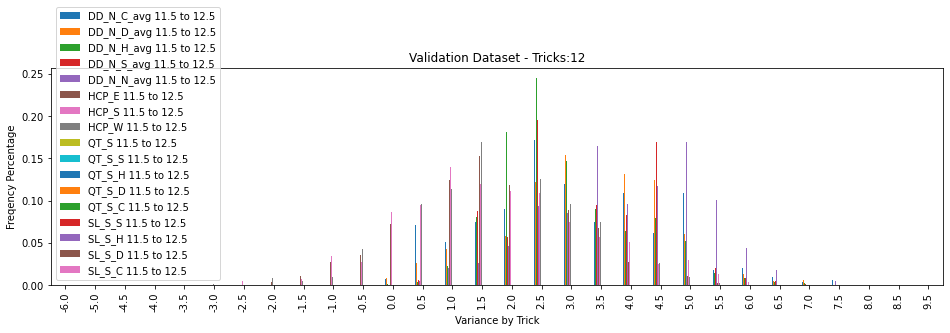

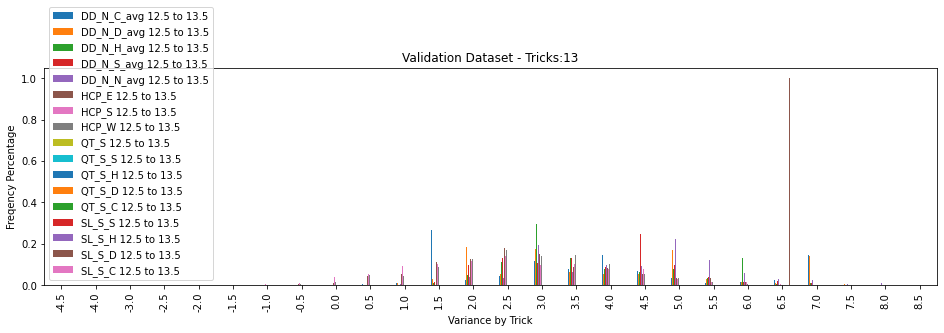

In [117]:
# plot dd variance, by trick count, using .5 trick precision
precision = .5
for t in range(6,13):
    plotd = {}
    for n in y_names:
        plotd[n+' '+str(t+.5)+' to '+str(t+1.5)] = df_preds[df_preds[n].between(t+.5,t+1.5,inclusive='left')][n+'_var'].astype('float').div(precision*10).round(1).mul(precision*10).value_counts(normalize=True).sort_index()
    pd.DataFrame(plotd).plot(kind='bar',figsize=(16,4), xlabel='Variance by Trick', ylabel='Freqency Percentage', title='Validation Dataset - Tricks:'+str(t+1))